# Puppies detection 🐶

Камера с щеночкми

https://www.youtube.com/watch?v=h-Z0wCdD3dI

In [ ]:
DEBUG = True

In [ ]:
!pip install yt-dlp
!pip install ffmpeg
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 106.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=5a8e8297bdd918d1f67f02d62e09bd6567869303f067da39618ecd4da32259a0
  Stored in directory: /root/.cache/pip/wheels/56/30/c5/576bdd729f3bc062d62a551be7fefd6ed2f761901568171e4e
Successfully built ffmpeg
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import cv2
from ultralytics import YOLO
from pathlib import Path
import subprocess
import ffmpeg
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# youtube_url = "https://www.youtube.com/watch?v=h-Z0wCdD3dI"

# # Получаем прямой URL потока
# result = subprocess.run(["yt-dlp", "-g", youtube_url], capture_output=True, text=True)
# stream_url = result.stdout.strip()

# # Сохраняем видео
# ffmpeg_cmd = [
#     "ffmpeg",
#     "-i", stream_url,
#     "-t", "00:01:00",
#     "-c", "copy",
#     "puppy_clip.mp4"
# ]
# subprocess.run(ffmpeg_cmd)

In [ ]:
!mkdir frames

In [ ]:
input_video = "puppy_clip.mp4"
frame_dir = Path("frames")
output_dir = Path("outputs")
output_video = "output_video.mp4"
frame_dir.mkdir(exist_ok=True)
output_dir.mkdir(exist_ok=True)

In [ ]:
if DEBUG:
    subprocess.run([
        "ffmpeg", "-i", input_video,
        "-vf", "fps=1",
        f"{frame_dir}/frame_%04d.jpg"
    ])
else:
    subprocess.run([
        "ffmpeg", "-i", input_video,
        "-vf", "fps=30",
        f"{frame_dir}/frame_%04d.jpg"
    ])

In [ ]:
model = YOLO("yolov8m.pt")

# Получаем FPS исходного видео
cap = cv2.VideoCapture(input_video)
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()

# Прогоняем каждый кадр через YOLO и рисуем только собак
for img_path in frame_dir.glob("*.jpg"):
    results = model(img_path, classes=[16], conf=0.2)
    if len(results[0].boxes) > 0:
        annotated_frame = results[0].plot(labels=[16])
    else:
        annotated_frame = cv2.imread(str(img_path))
    cv2.imwrite(str(output_dir / img_path.name), annotated_frame)

frame_count = len([f for f in os.listdir(output_dir) if f.endswith(".jpg")])
print(f"Сохранено кадров: {frame_count}")

100%|██████████| 49.7M/49.7M [00:00<00:00, 283MB/s]



image 1/1 /content/frames/frame_0055.jpg: 384x640 (no detections), 78.5ms
Speed: 15.3ms preprocess, 78.5ms inference, 208.3ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0016.jpg: 384x640 1 dog, 11.5ms
Speed: 2.4ms preprocess, 11.5ms inference, 185.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0044.jpg: 384x640 (no detections), 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0051.jpg: 384x640 1 dog, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0011.jpg: 384x640 (no detections), 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0036.jpg: 384x640 (no detections), 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 1.0ms postprocess per image at shape 

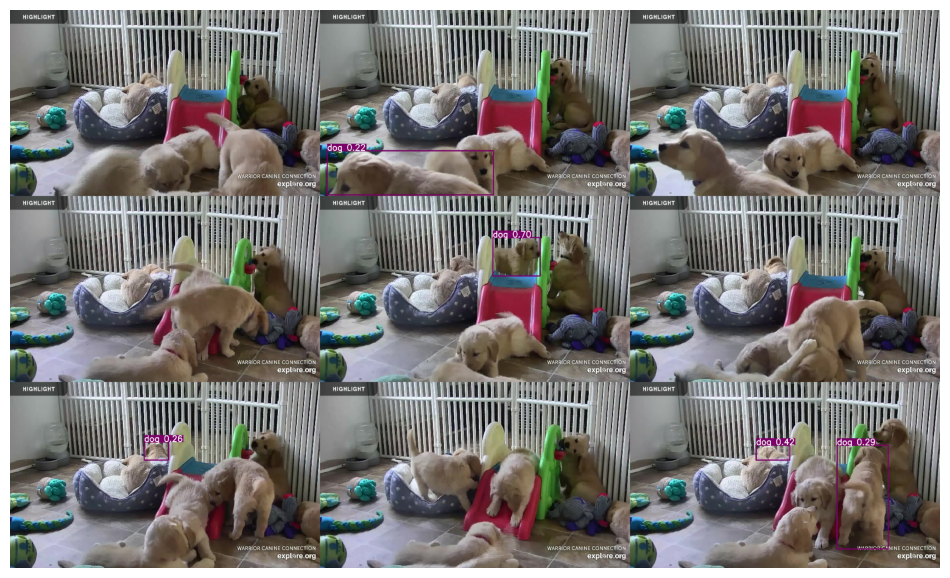

In [ ]:
rows, cols = 3, 3
grid_size = rows * cols

images_paths = list(output_dir.glob("*.jpg"))
random.shuffle(images_paths)
selected_images = images_paths[:grid_size]

frames = []
for path in selected_images:
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (640, 384))
    frames.append(resized)

grid_rows = []
for i in range(rows):
    row = np.hstack(frames[i * cols:(i + 1) * cols])
    grid_rows.append(row)

grid_image = np.vstack(grid_rows)

plt.figure(figsize=(12, 12))
plt.imshow(grid_image)
plt.axis('off')
plt.show()

Результат так себе, хоть YOLO и обучалась на куче фотографий собак, попробую обучить на датасете с собаками

In [ ]:
# if DEBUG:
#   subprocess.run([
#     "ffmpeg", "-framerate", "1", "-i", f"{output_dir}/frame_%04d.jpg",
#     "-c:v", "libx264", "-pix_fmt", "yuv420p", "-r", "30", output_video
# ])
# else:
#   subprocess.run([
#       "ffmpeg", "-framerate", str(fps), "-i", f"{output_dir}/frame_%04d.jpg",
#       "-c:v", "libx264", "-pix_fmt", "yuv420p", "-r", str(fps), output_video
#   ])

# print(f"Видео успешно собрано в {output_video}")

Для дообучения буду использовать датасет https://www.kaggle.com/datasets/kentvejrupmadsen/

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kentvejrupmadsen/tmod-yolo")

print("Path to dataset files:", path)

100%|██████████| 3.44G/3.44G [00:29<00:00, 127MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kentvejrupmadsen/tmod-yolo/versions/4


In [ ]:
import shutil
source_path = Path("/root/.cache/kagglehub/datasets/kentvejrupmadsen/tmod-yolo/versions/4")

# Куда копируем — видимая директория
dest_path = Path("/content/tmod-yolo")
shutil.copytree(source_path, dest_path, dirs_exist_ok=True)

print(f"Скопировано в: {dest_path}")

Скопировано в: /content/tmod-yolo


Все в целом тут ок, просто пошаманим с лейблами немного

Очищаем от ненужных классов

In [ ]:
import os
from pathlib import Path

# Пути
images_dir = Path("/content/tmod-yolo/images")
labels_dir = Path("/content/tmod-yolo/labels")

counter = 0
# Проверка каждого label файла
for label_file in labels_dir.glob("*.txt"):
    with open(label_file, "r") as f:
        lines = f.readlines()

    # Если хоть одна строка не с классом 1 — удаляем
    if any(not line.startswith("1 ") for line in lines):
        label_file.unlink()
        corresponding_image = images_dir / (label_file.stem + ".jpg")
        if corresponding_image.exists():
            corresponding_image.unlink()
        counter += 1

print(f"Удалено файлов: {counter}")

Удалено файлов: 1344


Меняем лейбл

In [ ]:
for label_file in labels_dir.glob("*.txt"):
    with open(label_file, "r") as f:
        lines = f.readlines()

    new_lines = [line.replace("1 ", "0 ", 1) for line in lines]

    with open(label_file, "w") as f:
        f.writelines(new_lines)

In [ ]:
images_path = "/content/tmod-yolo/images"
labels_path = "/content/tmod-yolo/labels"
val_images_path = "/content/tmod-yolo/val/images"
val_labels_path = "/content/tmod-yolo/val/labels"

os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg")]

val_files = random.sample(image_files, k=int(len(image_files) * 0.15))

for file_name in val_files:
    shutil.move(os.path.join(images_path, file_name), os.path.join(val_images_path, file_name))

    label_file = file_name.replace(".jpg", ".txt")
    if os.path.exists(os.path.join(labels_path, label_file)):
        shutil.move(os.path.join(labels_path, label_file), os.path.join(val_labels_path, label_file))

print(f"Перенесено {len(val_files)} изображений и меток в папку валидации.")

Перенесено 808 изображений и меток в папку валидации.


In [ ]:
images_path = "/content/tmod-yolo/images"
labels_path = "/content/tmod-yolo/labels"
train_images_path = "/content/tmod-yolo/train/images"
train_labels_path = "/content/tmod-yolo/train/labels"

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)

# Переносим все изображения и метки в папку тренировки
for file_name in os.listdir(images_path):
    if file_name.endswith(".jpg"):
        shutil.move(os.path.join(images_path, file_name), os.path.join(train_images_path, file_name))

        label_file = file_name.replace(".jpg", ".txt")
        if os.path.exists(os.path.join(labels_path, label_file)):
            shutil.move(os.path.join(labels_path, label_file), os.path.join(train_labels_path, label_file))

print("Все изображения и метки перенесены в папку 'train'.")

Все изображения и метки перенесены в папку 'train'.


Создаем ямлик

In [ ]:
import yaml

dataset_path = Path("/content/tmod-yolo")
images_path = dataset_path / "images"  # Папка с изображениями
labels_path = dataset_path / "labels"  # Папка с метками

data = {
  'path': '/content/tmod-yolo/',
  'train': 'train',
  'val' : 'val',
  'names': {'0': 'dog'}
}

# Путь для сохранения файла
yaml_path = dataset_path / "data.yaml"

# Запись данных в YAML
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"Файл data.yaml успешно создан в {yaml_path}")


Файл data.yaml успешно создан в /content/tmod-yolo/data.yaml


In [ ]:
model = YOLO("yolov8m.pt")

model.train(data='/content/tmod-yolo/data.yaml', epochs=10, imgsz=640)

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/tmod-yolo/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

100%|██████████| 755k/755k [00:00<00:00, 19.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/tmod-yolo/train/labels... 4584 images, 0 backgrounds, 1 corrupt: 100%|██████████| 4584/4584 [00:04<00:00, 1129.49it/s]

train: WARNING ⚠️ /content/tmod-yolo/train/images/b9320f17-frame_60511.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0757]


train: New cache created: /content/tmod-yolo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/tmod-yolo/val/labels... 808 images, 0 backgrounds, 0 corrupt: 100%|██████████| 808/808 [00:00<00:00, 856.74it/s]


val: New cache created: /content/tmod-yolo/val/labels.cache
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      6.56G      1.193      1.143      1.599          7        640: 100%|██████████| 287/287 [01:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:06<00:00,  4.10it/s]

                   all        808        808      0.468      0.514      0.476      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.09G      1.457      1.227      1.829          7        640: 100%|██████████| 287/287 [01:27<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.77it/s]

                   all        808        808      0.617      0.634       0.63      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.16G       1.35      1.042      1.725          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.77it/s]

                   all        808        808      0.727      0.763      0.813       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.22G      1.188     0.8744       1.58          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.80it/s]

                   all        808        808       0.88      0.842      0.903      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      8.29G      1.087     0.7578       1.49          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.77it/s]

                   all        808        808       0.84      0.724       0.84      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      8.36G     0.9787     0.6594      1.395          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.86it/s]

                   all        808        808      0.926      0.937      0.968      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      8.43G     0.9001     0.5779      1.321          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.86it/s]

                   all        808        808      0.945      0.891      0.966      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      8.49G     0.8076     0.5035       1.24          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.89it/s]

                   all        808        808      0.954      0.953      0.987      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      8.56G     0.7309     0.4557      1.174          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.85it/s]

                   all        808        808      0.974      0.957      0.992       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.62G      0.676     0.4039      1.134          7        640: 100%|██████████| 287/287 [01:26<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.86it/s]

                   all        808        808      0.974      0.979      0.993      0.833



10 epochs completed in 0.262 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 92 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:05<00:00,  4.64it/s]


                   all        808        808      0.974      0.978      0.993      0.833
Speed: 0.1ms preprocess, 3.3ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7807c201d690>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

Попробуем теперь на этой модели

In [ ]:
frame_dir = Path("frames")
output_dir = Path("outputs_trained")
output_dir.mkdir(exist_ok=True)

In [ ]:
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Прогоняем каждый кадр через YOLO и рисуем только собак
for img_path in frame_dir.glob("*.jpg"):
    results = model(img_path, classes=[0], conf=0.1)
    if len(results[0].boxes) > 0:
        annotated_frame = results[0].plot(labels=[0])
    else:
        annotated_frame = cv2.imread(str(img_path))
    cv2.imwrite(str(output_dir / img_path.name), annotated_frame)

frame_count = len([f for f in os.listdir(output_dir) if f.endswith(".jpg")])
print(f"Сохранено кадров: {frame_count}")


image 1/1 /content/frames/frame_0055.jpg: 384x640 1 dog, 11.0ms
Speed: 2.5ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0016.jpg: 384x640 1 dog, 10.4ms
Speed: 2.3ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0044.jpg: 384x640 3 dogs, 10.6ms
Speed: 2.3ms preprocess, 10.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0051.jpg: 384x640 1 dog, 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0011.jpg: 384x640 1 dog, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0036.jpg: 384x640 1 dog, 10.3ms
Speed: 2.2ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/

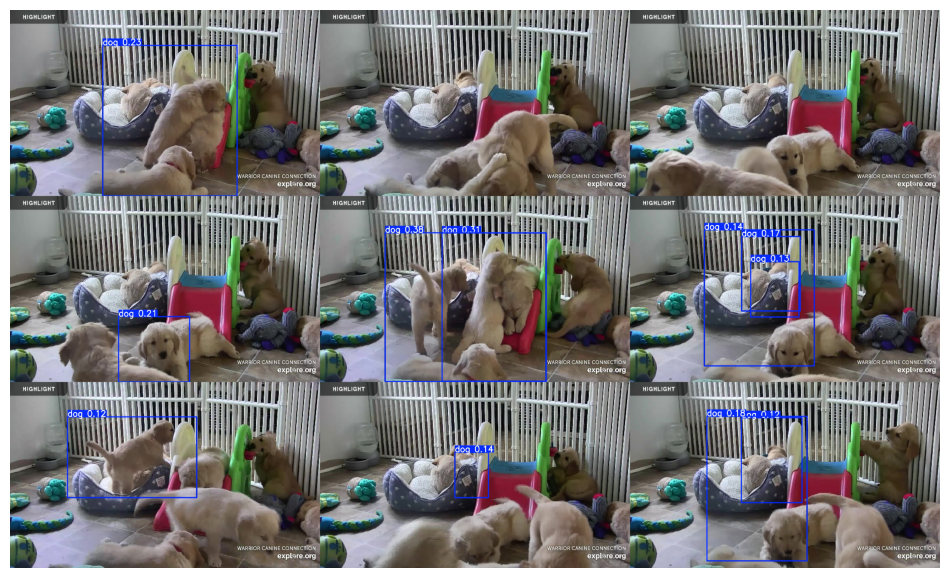

In [ ]:
rows, cols = 3, 3
grid_size = rows * cols

images_paths = list(output_dir.glob("*.jpg"))
random.shuffle(images_paths)
selected_images = images_paths[:grid_size]

frames = []
for path in selected_images:
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (640, 384))
    frames.append(resized)

grid_rows = []
for i in range(rows):
    row = np.hstack(frames[i * cols:(i + 1) * cols])
    grid_rows.append(row)

grid_image = np.vstack(grid_rows)

plt.figure(figsize=(12, 12))
plt.imshow(grid_image)
plt.axis('off')
plt.show()

По-моему, стало хуже, хотя модель обучилась неплохо. Думаю, придется разметить кадры вручную и дообучить еще и на них

Разложу на кадры другое минутное видео

In [ ]:
input_video = "puppy_clip_2.mp4"
frame_dir = Path("frames_for_cvat")
frame_dir.mkdir(exist_ok=True)

In [ ]:
if DEBUG:
    subprocess.run([
        "ffmpeg", "-i", input_video,
        "-vf", "fps=1",
        f"{frame_dir}/frame_%04d.jpg"
    ])
else:
    subprocess.run([
        "ffmpeg", "-i", input_video,
        "-vf", "fps=30",
        f"{frame_dir}/frame_%04d.jpg"
    ])

In [ ]:
import shutil

folder_to_zip = "/content/frames_for_cvat"

output_zip = "/content/frames_for_cvat_archive"

shutil.make_archive(output_zip, 'zip', folder_to_zip)
print(f"Архив создан по пути: {output_zip}.zip")


Архив создан по пути: /content/frames_for_cvat_archive.zip


In [6]:
import shutil

# Путь к архиву
zip_path = "/content/hand_train/labels.zip"

# Куда разархивировать
extract_to = "/content/hand_train"

# Распаковка
shutil.unpack_archive(zip_path, extract_to)

print(f"Архив распакован в {extract_to}")


Архив распакован в /content/hand_train


In [7]:
images_path = "/content/hand_train/images"
labels_path = "/content/hand_train/labels"
val_images_path = "/content/hand_train/val/images"
val_labels_path = "/content/hand_train/val/labels"

os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg")]

val_files = random.sample(image_files, k=int(len(image_files) * 0.15))

for file_name in val_files:
    shutil.move(os.path.join(images_path, file_name), os.path.join(val_images_path, file_name))

    label_file = file_name.replace(".jpg", ".txt")
    if os.path.exists(os.path.join(labels_path, label_file)):
        shutil.move(os.path.join(labels_path, label_file), os.path.join(val_labels_path, label_file))

print(f"Перенесено {len(val_files)} изображений и меток в папку валидации.")

Перенесено 9 изображений и меток в папку валидации.


In [8]:
train_images_path = "/content/hand_train/train/images"
train_labels_path = "/content/hand_train/train/labels"

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)

# Переносим все изображения и метки в папку тренировки
for file_name in os.listdir(images_path):
    if file_name.endswith(".jpg"):
        shutil.move(os.path.join(images_path, file_name), os.path.join(train_images_path, file_name))

        label_file = file_name.replace(".jpg", ".txt")
        if os.path.exists(os.path.join(labels_path, label_file)):
            shutil.move(os.path.join(labels_path, label_file), os.path.join(train_labels_path, label_file))

print("Все изображения и метки перенесены в папку 'train'.")

Все изображения и метки перенесены в папку 'train'.


In [14]:
import yaml

dataset_path = Path("/content/hand_train")
images_path = dataset_path / "images"  # Папка с изображениями
labels_path = dataset_path / "labels"  # Папка с метками

data = {
  'path': '/content/hand_train',
  'train': 'train',
  'val' : 'val',
  'names': {'0': 'dog'}
}

# Путь для сохранения файла
yaml_path = dataset_path / "data.yaml"

# Запись данных в YAML
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print(f"Файл data.yaml успешно создан в {yaml_path}")

Файл data.yaml успешно создан в /content/hand_train/data.yaml


In [16]:
model = YOLO("yolov8n.pt")

model.train(data='/content/hand_train/data.yaml', epochs=25, imgsz=640, augment=True)

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/hand_train/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wi

train: Scanning /content/hand_train/train/labels.cache... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/hand_train/val/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.19G      1.343      3.014      1.506         46        640: 100%|██████████| 4/4 [00:00<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

                   all          9         48     0.0163      0.917      0.161     0.0877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.19G      1.263      2.811      1.479         23        640: 100%|██████████| 4/4 [00:00<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.84it/s]

                   all          9         48     0.0163      0.917      0.441      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.19G      1.075      2.397      1.232         33        640: 100%|██████████| 4/4 [00:00<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.03it/s]

                   all          9         48      0.017      0.958      0.539      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.19G      1.038      1.573      1.205         34        640: 100%|██████████| 4/4 [00:00<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.76it/s]

                   all          9         48          1      0.496       0.77      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.19G     0.9929      1.185      1.151         52        640: 100%|██████████| 4/4 [00:00<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.79it/s]

                   all          9         48      0.965      0.729      0.773      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.19G     0.9344      1.062      1.113         37        640: 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.66it/s]

                   all          9         48      0.978      0.729      0.783      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.19G     0.9109      1.006      1.085         32        640: 100%|██████████| 4/4 [00:00<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.87it/s]

                   all          9         48      0.866      0.674      0.741      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.19G     0.8457     0.9464      1.076         47        640: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.77it/s]

                   all          9         48      0.719      0.604      0.706      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.19G     0.8109      0.885      1.063         40        640: 100%|██████████| 4/4 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.58it/s]

                   all          9         48      0.886      0.521       0.72      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       2.2G     0.8134     0.9404      1.088         18        640: 100%|██████████| 4/4 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.17it/s]

                   all          9         48      0.711      0.666      0.757      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25       2.2G     0.7858     0.8356       1.06         24        640: 100%|██████████| 4/4 [00:00<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all          9         48      0.801      0.754      0.816       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25       2.2G     0.8506     0.8749      1.089         19        640: 100%|██████████| 4/4 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.55it/s]

                   all          9         48      0.907       0.75      0.861      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.21G     0.7545     0.7937      1.007         46        640: 100%|██████████| 4/4 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.47it/s]

                   all          9         48      0.981      0.667       0.81      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.22G     0.7041     0.7978     0.9919         30        640: 100%|██████████| 4/4 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.93it/s]

                   all          9         48          1      0.682      0.801      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.22G     0.7199      0.742      1.005         34        640: 100%|██████████| 4/4 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.90it/s]

                   all          9         48      0.946      0.688      0.786      0.575


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.23G     0.7435     0.9586      1.017         19        640: 100%|██████████| 4/4 [00:00<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.33it/s]

                   all          9         48      0.926      0.604      0.706      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.24G     0.6536     0.8037     0.9508         16        640: 100%|██████████| 4/4 [00:00<00:00, 11.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.54it/s]

                   all          9         48      0.793      0.479      0.621      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.24G     0.6616     0.8369     0.9462         15        640: 100%|██████████| 4/4 [00:00<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.44it/s]

                   all          9         48      0.897      0.417      0.603      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.24G     0.6039      0.794     0.9119         16        640: 100%|██████████| 4/4 [00:00<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.55it/s]

                   all          9         48      0.934      0.562      0.692      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.24G     0.6929     0.8322     0.9803         15        640: 100%|██████████| 4/4 [00:00<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.81it/s]

                   all          9         48      0.913      0.653      0.744      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.24G     0.6623      0.818     0.9795         12        640: 100%|██████████| 4/4 [00:00<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.85it/s]

                   all          9         48      0.973      0.771      0.831        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.24G     0.5835     0.7008     0.9297         16        640: 100%|██████████| 4/4 [00:00<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 15.93it/s]

                   all          9         48      0.991      0.771      0.862      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.24G     0.5737     0.6848     0.8961         16        640: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.08it/s]

                   all          9         48      0.974      0.781      0.889      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.24G     0.5652     0.6766     0.8763         17        640: 100%|██████████| 4/4 [00:00<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 18.21it/s]

                   all          9         48      0.953      0.812      0.898      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.24G     0.6219      0.721     0.9122         15        640: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.67it/s]

                   all          9         48      0.937      0.833      0.905      0.711



25 epochs completed in 0.006 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


                   all          9         48      0.862      0.792      0.896      0.695
Speed: 0.1ms preprocess, 21.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train5


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c748111efd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [17]:
input_video = "puppy_clip.mp4"
frame_dir = Path("frames")
output_dir = Path("outputs")
output_video = "output_video.mp4"
frame_dir.mkdir(exist_ok=True)
output_dir.mkdir(exist_ok=True)

In [18]:
if DEBUG:
    subprocess.run([
        "ffmpeg", "-i", input_video,
        "-vf", "fps=1",
        f"{frame_dir}/frame_%04d.jpg"
    ])
else:
    subprocess.run([
        "ffmpeg", "-i", input_video,
        "-vf", "fps=30",
        f"{frame_dir}/frame_%04d.jpg"
    ])

In [21]:
model = YOLO("/content/runs/detect/train5/weights/best.pt")

# Получаем FPS исходного видео
cap = cv2.VideoCapture(input_video)
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()

# Прогоняем каждый кадр через YOLO и рисуем только собак
for img_path in frame_dir.glob("*.jpg"):
    results = model(img_path, classes=[0], conf=0.5)
    if len(results[0].boxes) > 0:
        annotated_frame = results[0].plot(labels=[0])
    else:
        annotated_frame = cv2.imread(str(img_path))
    cv2.imwrite(str(output_dir / img_path.name), annotated_frame)

frame_count = len([f for f in os.listdir(output_dir) if f.endswith(".jpg")])
print(f"Сохранено кадров: {frame_count}")


image 1/1 /content/frames/frame_0055.jpg: 384x640 4 dogs, 9.3ms
Speed: 2.6ms preprocess, 9.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0016.jpg: 384x640 3 dogs, 7.9ms
Speed: 2.3ms preprocess, 7.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0044.jpg: 384x640 3 dogs, 8.4ms
Speed: 2.4ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0051.jpg: 384x640 3 dogs, 9.1ms
Speed: 2.4ms preprocess, 9.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0011.jpg: 384x640 4 dogs, 8.1ms
Speed: 2.4ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0036.jpg: 384x640 5 dogs, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/frames/frame_0

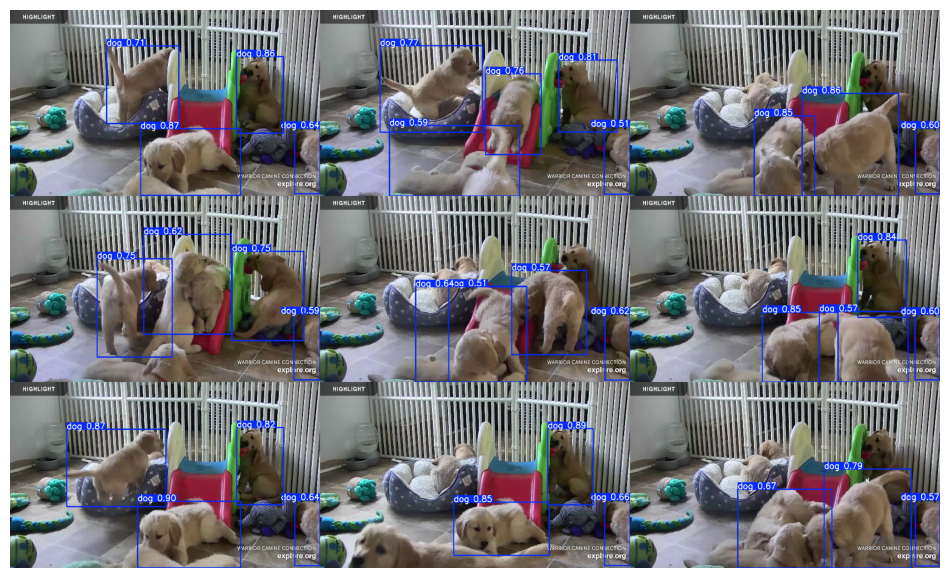

In [22]:
rows, cols = 3, 3
grid_size = rows * cols

images_paths = list(output_dir.glob("*.jpg"))
random.shuffle(images_paths)
selected_images = images_paths[:grid_size]

frames = []
for path in selected_images:
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (640, 384))
    frames.append(resized)

grid_rows = []
for i in range(rows):
    row = np.hstack(frames[i * cols:(i + 1) * cols])
    grid_rows.append(row)

grid_image = np.vstack(grid_rows)

plt.figure(figsize=(12, 12))
plt.imshow(grid_image)
plt.axis('off')
plt.show()

Вот так уже намного лучше

Это были эксперименты, для финальной модели я размечу более разреженные кадры и обучу модель на них, чтобы у нее была большая вариативность